#1. Import all dependencies

In [10]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
#from google.colab import files
#files.upload()

In [4]:
# Reload the dataset and clean column names
df = pd.read_csv("/Users/sajid/Downloads/Housing_price_data - data.csv")
df.columns = df.columns.str.strip()  # Remove extra spaces in column names

#2. Data Processing

In [5]:
print(df.columns)

Index(['Area in sq feet', 'Prices in $'], dtype='object')


In [6]:
df.columns = ['area in sq feet', 'Prices']

In [7]:
X = np.array(df['area in sq feet']).reshape(-1, 1)
y = np.array(df['Prices'])

In [8]:
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


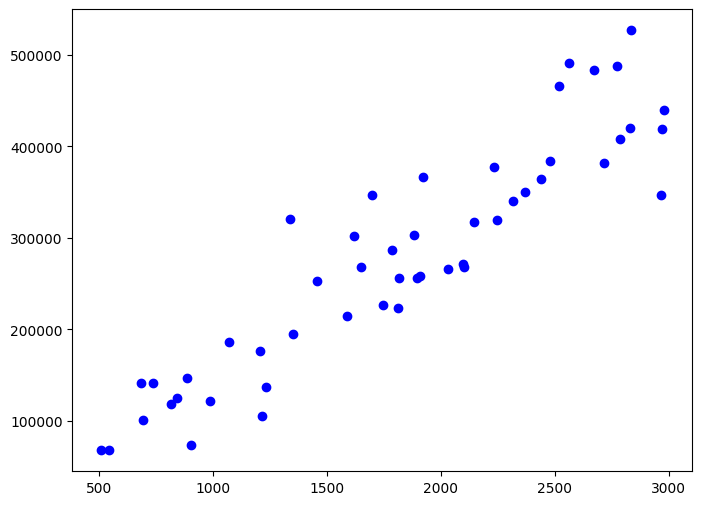

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(df['area in sq feet'], df['Prices'], label='Actual Prices', color='blue')

#3. Model training



In [12]:
# Define hyperparameters
learning_rate = 0.00001
num_iterations = 100000
regularization_param = 0.1

### best hyperparameters


In [13]:
# best hyperparameters
#learning_rate = 0.001
#num_iterations = 1000

In [14]:
# Initialize weights and bias
weights = np.random.rand(1)
bias = 0


In [15]:
#define the cost function
def cost_function(X, y, weights, bias):
  y_pred = np.dot(X, weights) + bias
  mse = np.mean((y_pred - y)**2)
  return mse


In [16]:
#define gd function
def gradient_descent(X, y, learning_rate, num_iterations, weights, bias):
  n = len(y)

  for _ in range(num_iterations):
    y_pred = np.dot(X, weights) + bias
    gradient_weights = (2/n) * np.dot(X.T, (y_pred - y))
    gradient_bias = (2/n) * np.sum(y_pred - y)
    weights = weights - learning_rate * gradient_weights
    bias = bias - learning_rate * gradient_bias

  return weights, bias

In [17]:
# Run gradient descent to get optimized weights and bias
costs = []
for _ in range(num_iterations):
  y_pred = np.dot(X_scaled, weights) + bias
  gradient_weights = (2/len(y)) * np.dot(X_scaled.T, (y_pred - y))
  gradient_bias = (2/len(y)) * np.sum(y_pred - y)
  weights = weights - learning_rate * gradient_weights
  bias = bias - learning_rate * gradient_bias
  costs.append(cost_function(X_scaled, y, weights, bias))

optimized_weights = weights
optimized_bias = bias

In [18]:
weights

array([98123.78001886])

In [19]:
bias

240726.63059447872

#4.Predict and Visualize

In [20]:
# Predict prices for the entire dataset
y_pred = np.dot(X_scaled, optimized_weights) + optimized_bias

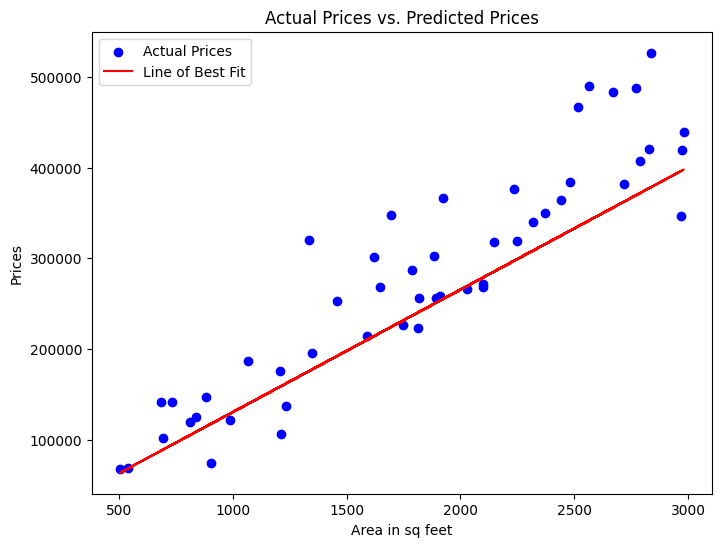

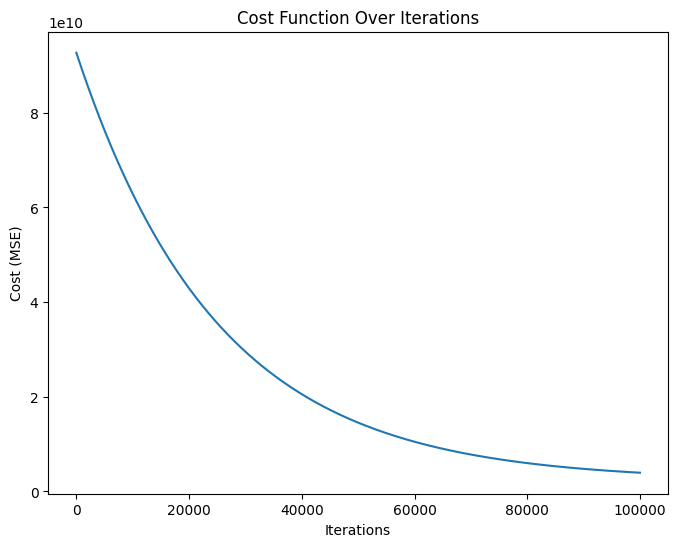

In [21]:
# Create a scatter plot of actual prices vs. area
plt.figure(figsize=(8, 6))
plt.scatter(df['area in sq feet'], df['Prices'], label='Actual Prices', color='blue')

# Plot the line of best fit
plt.plot(df['area in sq feet'], y_pred, label='Line of Best Fit', color='red')

# Add labels and title
plt.xlabel('Area in sq feet')
plt.ylabel('Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.legend()
plt.show()

# Plot the cost function
plt.figure(figsize=(8, 6))
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost Function Over Iterations')
plt.show()